<h1 align="center"> Python Essentials: Data Visualization.</h1>

    <McKenna Pitts>
    <Math 320 Section 2>
    <December 10, 2018>

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.special import comb

In [4]:
plt.rcParams["figure.dpi"] = 300     # Raise figure quality.

### Problem 1

The file `anscombe.npy` contains Anscombe’s quartet.
For each section of the quartet,
- Plot the data as a scatter plot on the box [0, 20] × [0, 13].
- Use `scipy.stats.linregress()` to calculate the slope and intercept of the least squares regression line for the data and its correlation coefficient (the first three return values).
- Plot the least squares regression line over the scatter plot on the domain $x\in[0,20]$.
- Report the mean and variance in $x$ and $y$, the slope and intercept of the regression line, and the correlation coefficient. Compare these statistics to those of the other sections.
- Describe how the section is similar to the others and how it is different.

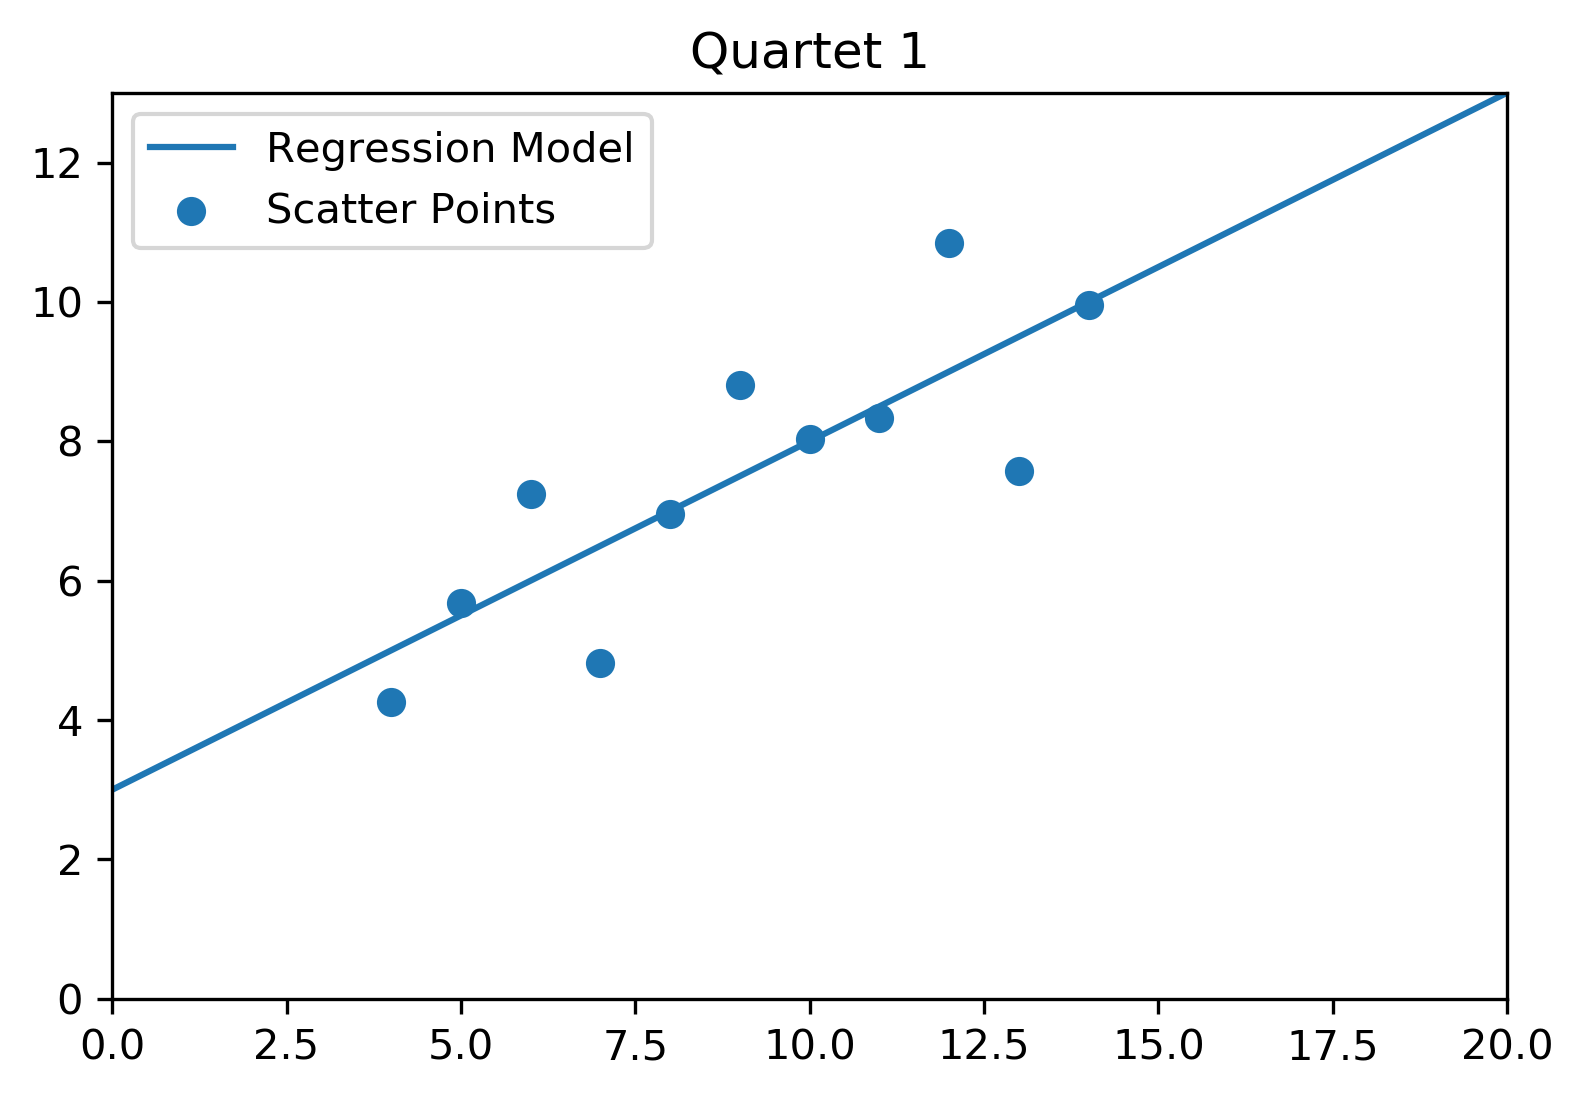

X Mean:		 9.0
Y Mean:		 7.500909090909093
Slope:		 0.5000909090909091
Intercept:	 3.0000909090909103
Correlation Coefficient: 0.8164205163448399


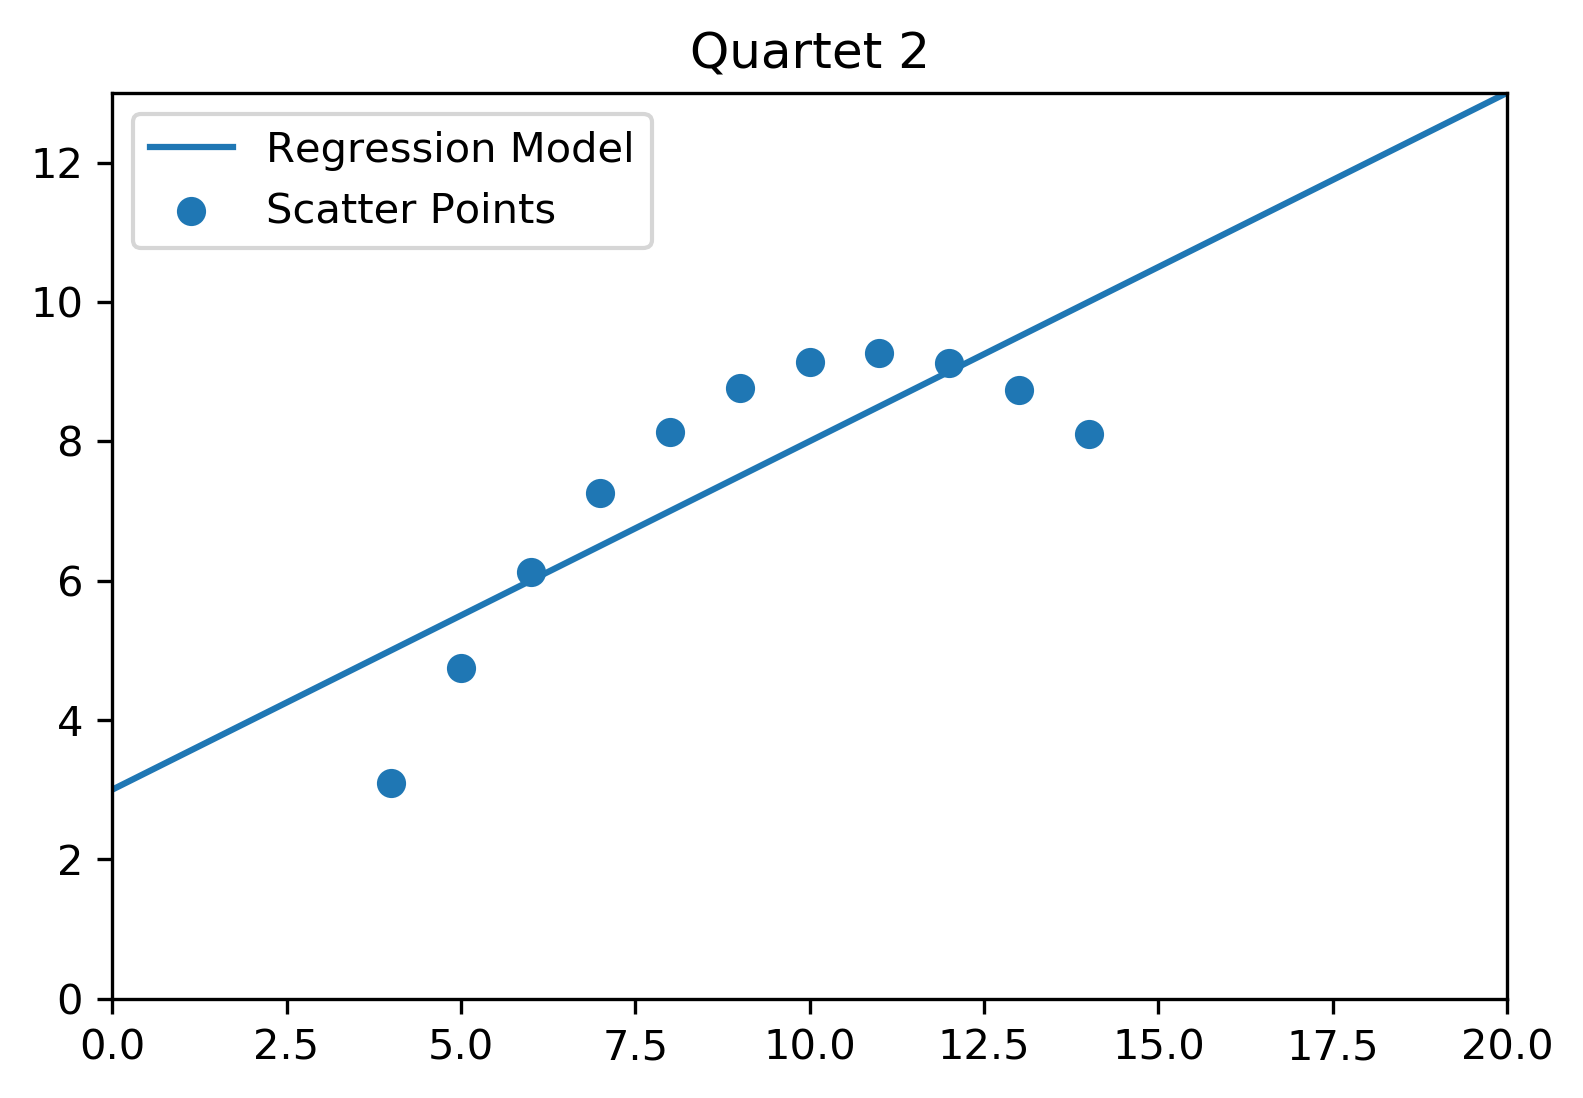

X Mean:		 7.500909090909093
Y Mean:		 9.0
Slope:		 0.5000000000000001
Intercept:	 3.000909090909089
Correlation Coefficient: 0.816236506000243


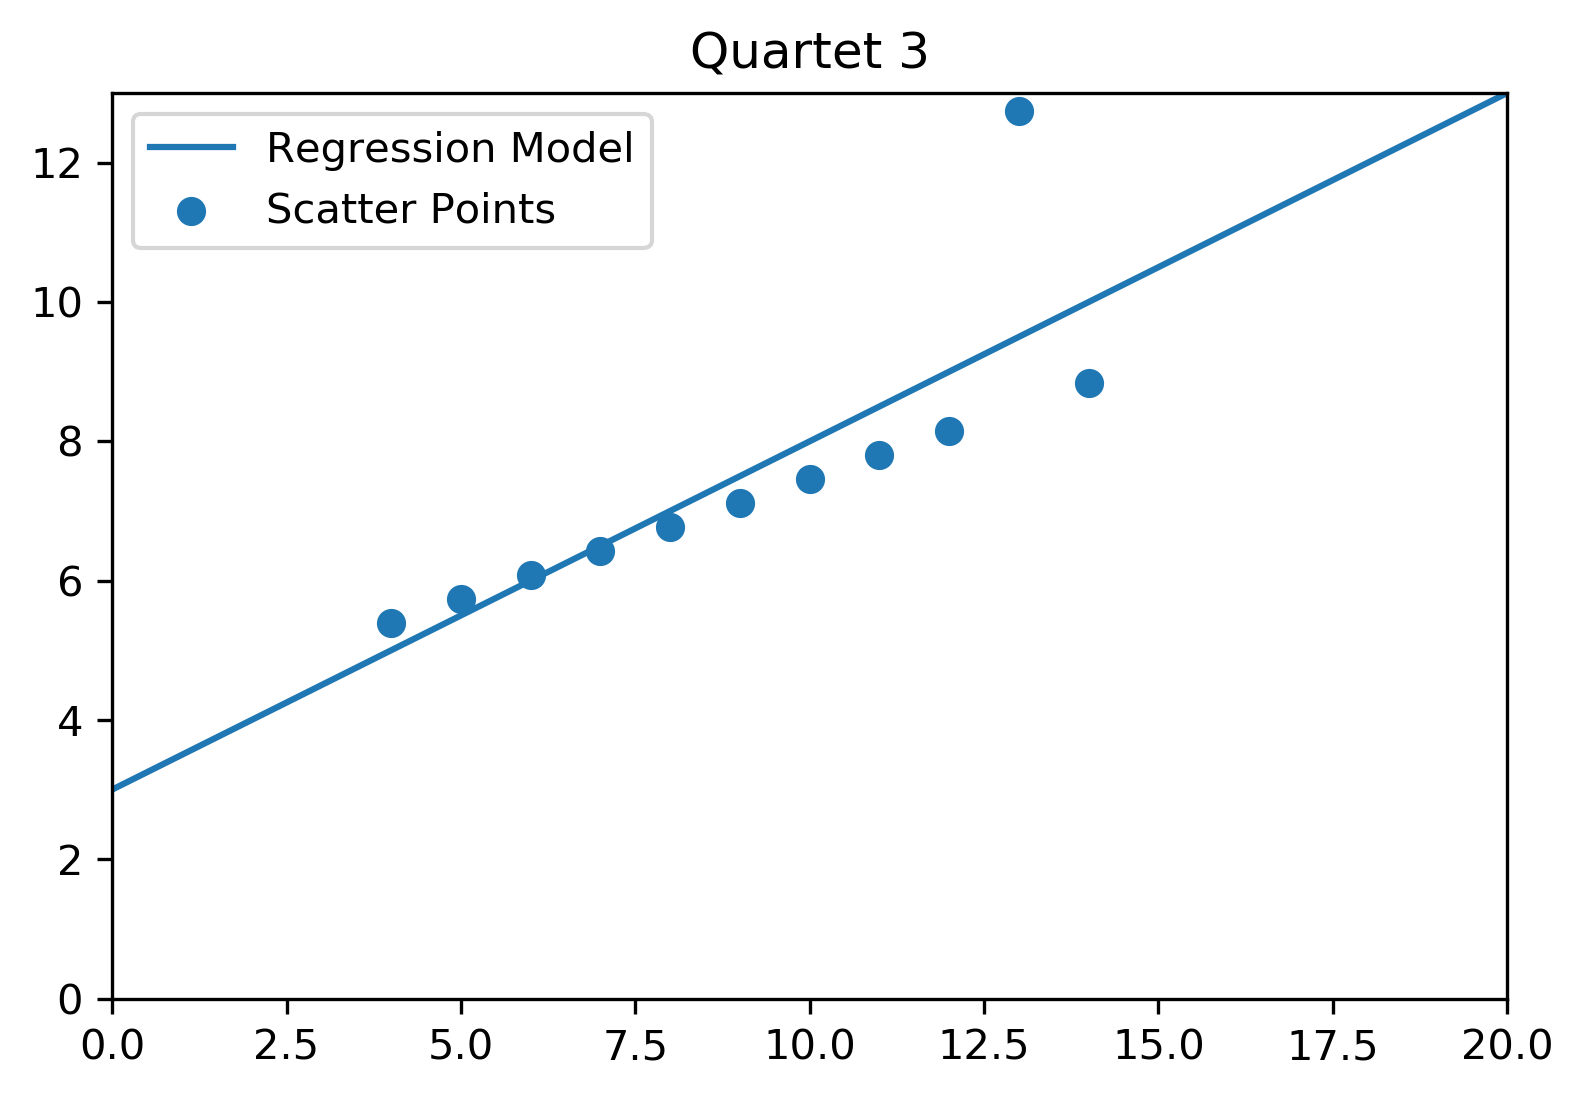

X Mean:		 9.0
Y Mean:		 7.50090909090909
Slope:		 0.4997272727272729
Intercept:	 3.002454545454544
Correlation Coefficient: 0.8162867394895984


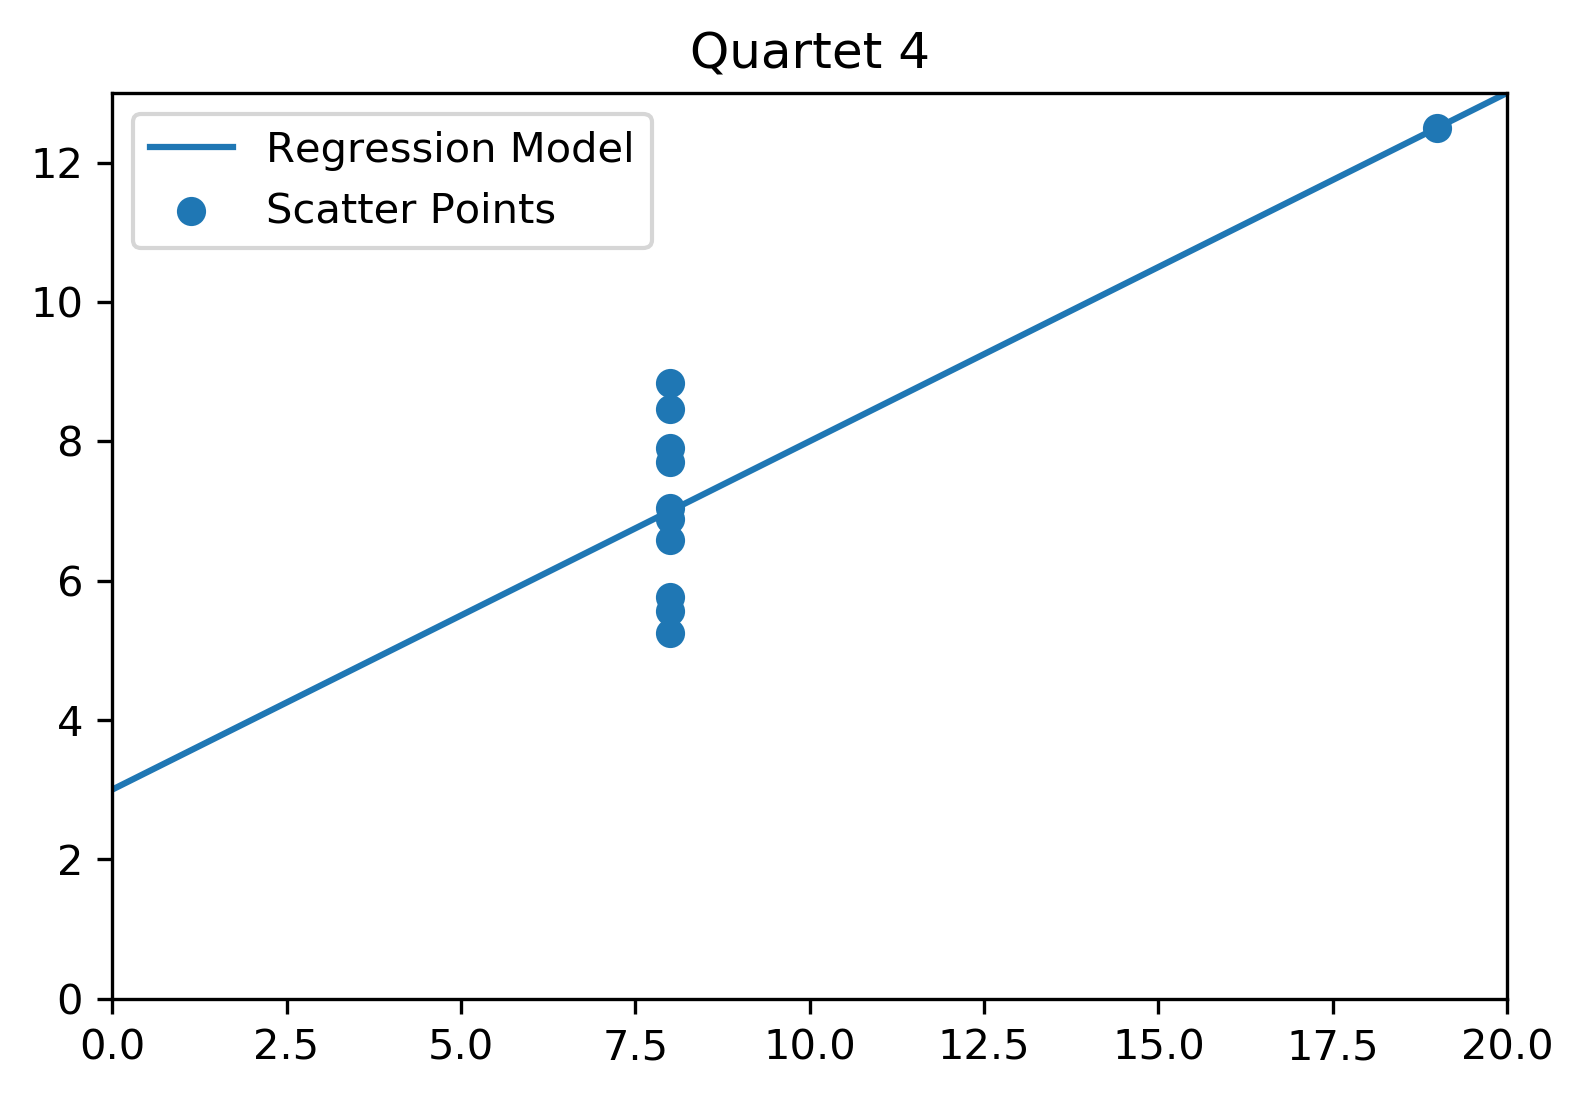

X Mean:		 7.50090909090909
Y Mean:		 9.0
Slope:		 0.4999090909090909
Intercept:	 3.0017272727272726
Correlation Coefficient: 0.8165214368885028
It's interesting to notice that each regression line is practically the same for each scatter plot.
This shows that lines of regression may not always be the best approximator for scatter points.


In [18]:
A = np.load("anscombe.npy")                 #load the data
for i in range(4):                          #For each quartet
    plt.scatter(A[:,int(2*i)],A[:,int(2*i)+1],label='Scatter Points')                     #Plot the points
    slope, intercept, rval = stats.linregress(A[:,int(2*i)],A[:,int(2*i)+1])[:3]
    n = np.arange(21)
    plt.plot(n,intercept + slope*n,label='Regression Model')                              #Plot the least squares regression line
    plt.xlim([0,20])                        #Domain of x
    plt.ylim([0,13])                        #Domain of Y
    plt.legend(loc='upper left')
    plt.title('Quartet '+str(int(i+1)))
    plt.show()
    print('X Mean:\t\t',np.mean(A[:,i]))    #Print mean of x
    print('Y Mean:\t\t',np.mean(A[:,i+1]))  #Print mean of y
    print('Slope:\t\t',slope)               #Print slope
    print('Intercept:\t',intercept)         #Print intercept
    print('Correlation Coefficient:',rval)  #Print correlation coefficient
print("It's interesting to notice that each regression line is practically the same for each scatter plot.\n"
    "This shows that lines of regression may not always be the best approximator for scatter points.")




### Problem 2
The $n + 1$ Bernstein basis polynomials of degree $n$ are defined as follows.

$$b_{n,v}(x) = \binom{n}{v}x^v(1-x)^{n-v},\quad v=0,\ 1,\ \ldots,\ n$$

Plot the first $10$ Bernstein basis polynomials ($n = 0,\ 1,\ 2,\ 3$) as small multiples on the domain $[0, 1] \times [0, 1]$.
Label the subplots for clarity, adjust tick marks and labels for simplicity, and set the window limits of
each plot to be the same.
Consider arranging the subplots so that the rows correspond with $n$ and the columns with $v$.

(Hint: The constant $\binom{n}{v} = \frac{n!}{v!(n-v)!}$ is called the binomial coefficient and can be efficiently computed with `scipy.special.binom()` or `scipy.misc.comb()`.)

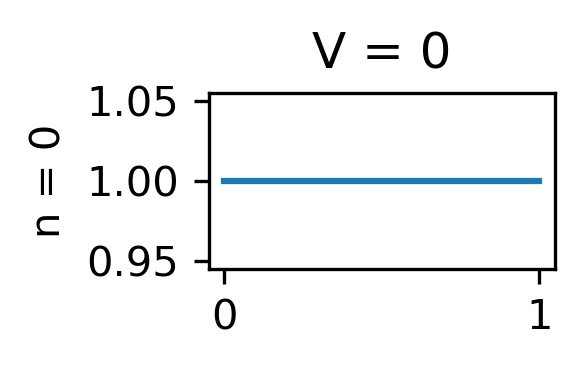

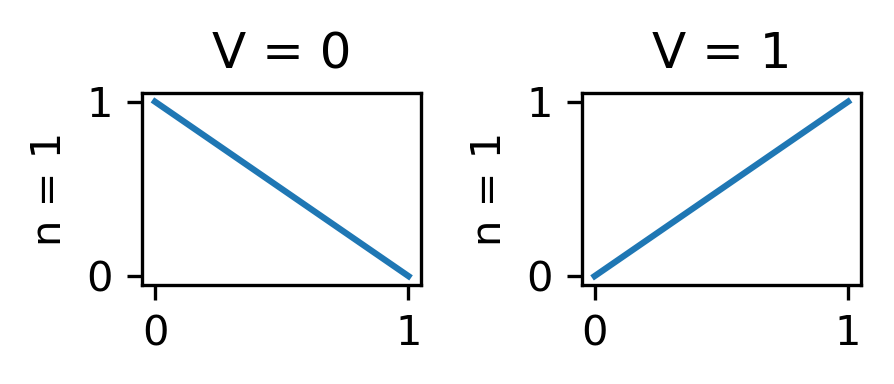

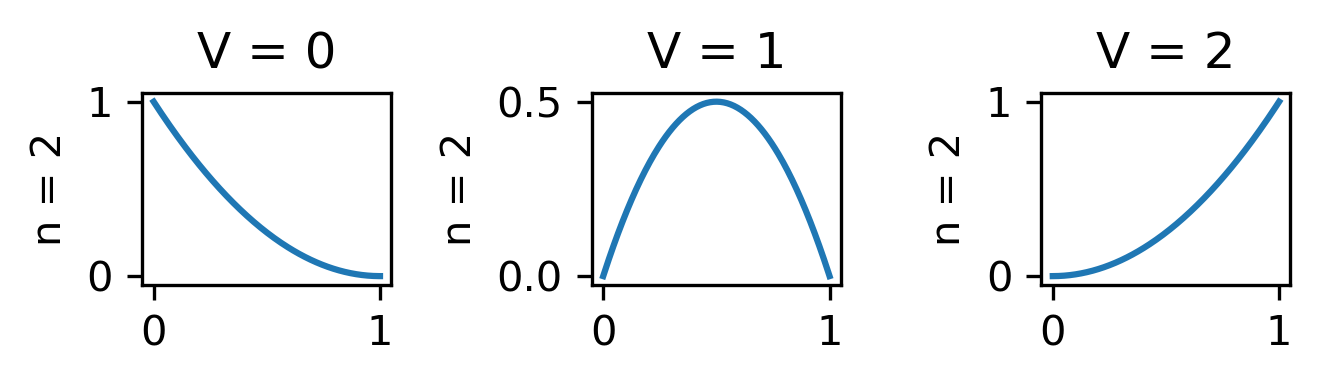

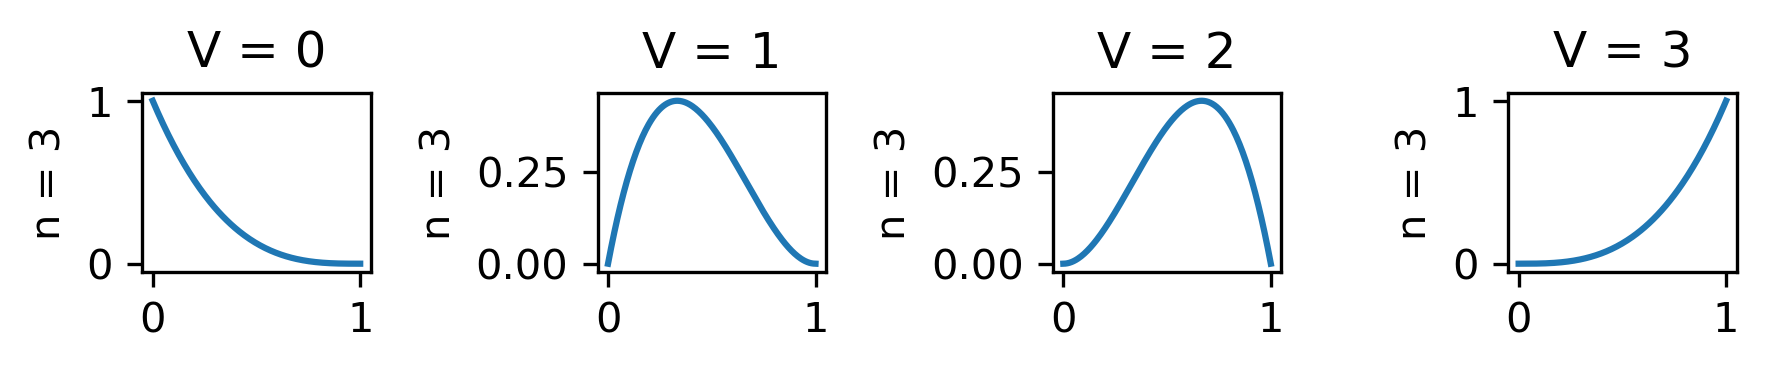

In [19]:
x = np.linspace(0,1,200)             #Domain of x
for i in range(4):                   #For n = 0,1,2,3
    #plt.figure(figsize=(15,7))
    #plt.suptitle('Bernstein Polynomials of Size '+str(i))
    v = np.arange(i+1)
    for j in v:
        plt.subplot(4,4,i*4 + j + 1)      #Create the subplot
        plt.title('V = '+str(j))
        combs = comb(i,j,exact=False)*(x**j)*((1-x)**(i-j))
        plt.ylabel('n = '+str(i))
        plt.plot(x,combs)                 #Plot the Bernstein basis polynomials
    plt.tight_layout()
    plt.show()



### Problem 3

The file `MLB.npy` contains measurements from over 1,000 recent Major League Baseball players, compiled by UCLA.
Each row in the array represents a different player; the columns are the player’s height (in inches), weight (in pounds), and age (in years), in that order.

Create several visualizations to show the correlations between height, weight, and age in the MLB data set.
Use at least one scatter plot.
Adjust the marker size, plot a regression line, change the window limits, and use small multiples where appropriate.

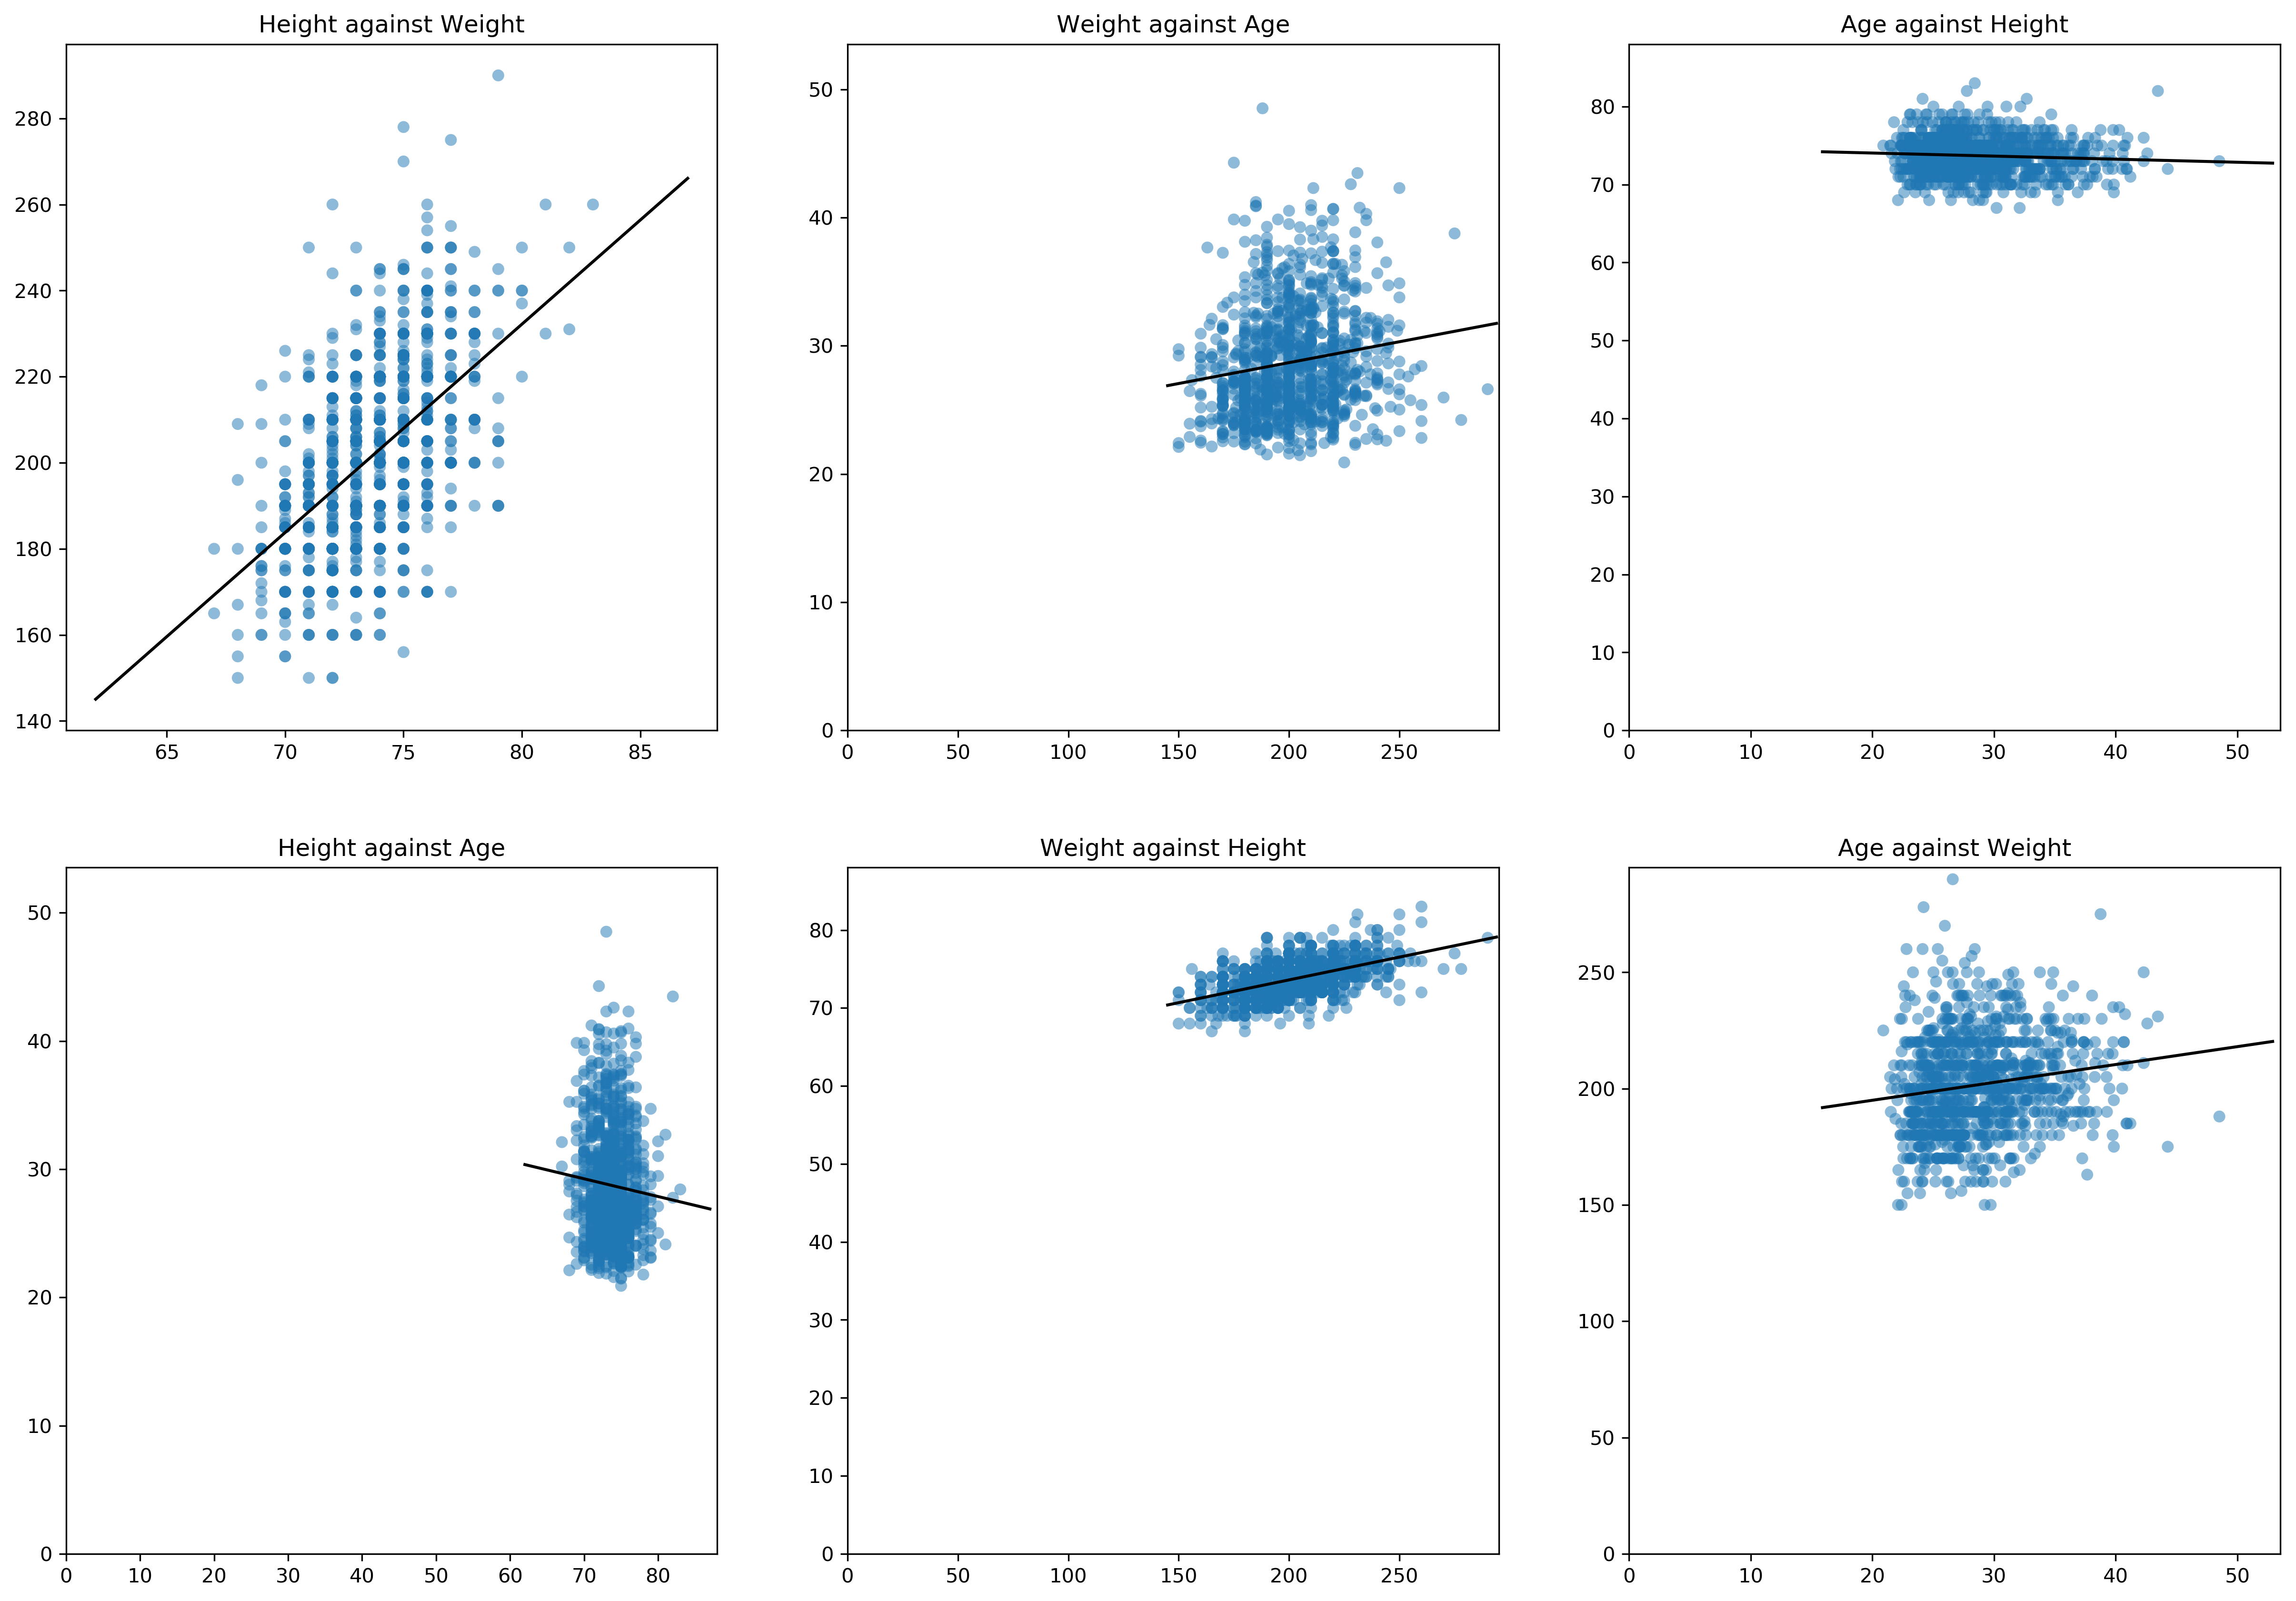

In [20]:
height, weight, age = np.load("MLB.npy").T
strings = ['Height','Weight','Age']
plt.figure(figsize=(20,14))
hxs = np.arange(min(height)-5,max(height)+5)
wxs = np.arange(min(weight)-5,max(weight)+5)
axs = np.arange(min(age)-5,max(age)+5)

# Height against Weight
plt.subplot(231)
plt.title(str)
plt.scatter(height,weight,alpha=.5,edgecolor='none')
slope, intercept = stats.linregress(height,weight)[:2]
plt.plot(hxs,intercept + slope*hxs,'k-')
plt.title(strings[0] + ' against ' + strings[1])

# Weight against Age
plt.subplot(232)
plt.scatter(weight,age,alpha=.5,edgecolor='none')
plt.axis([0,max(weight)+5,0,max(age)+5])
slope, intercept = stats.linregress(weight,age)[:2]
plt.plot(wxs,intercept + slope*wxs,'k-')
plt.title(strings[1] + ' against ' + strings[2])

# Age against Height
plt.subplot(233)
plt.scatter(age,height,alpha=.5,edgecolor='none')
plt.axis([0,max(age)+5,0,max(height)+5])
slope, intercept = stats.linregress(age,height)[:2]
plt.plot(axs,intercept + slope*axs,'k-')
plt.title(strings[2] + ' against ' + strings[0])

# Height against Age
plt.subplot(234)
plt.scatter(height,age,alpha=.5,edgecolor='none')
plt.axis([0,max(height)+5,0,max(age)+5])
slope, intercept = stats.linregress(height,age)[:2]
plt.plot(hxs,intercept + slope*hxs,'k-')
plt.title(strings[0] + ' against ' + strings[2])

# Weight against Height
plt.subplot(235)
plt.scatter(weight,height,alpha=.5,edgecolor='none')
plt.axis([0,max(weight)+5,0,max(height)+5])
slope, intercept = stats.linregress(weight,height)[:2]
plt.plot(wxs,intercept + slope*wxs,'k-')
plt.title(strings[1] + ' against ' + strings[0])

# Age against Weight
plt.subplot(236)
plt.scatter(age,weight,alpha=.5,edgecolor='none')
plt.axis([0,max(age)+5,0,max(weight)+5])
slope, intercept = stats.linregress(age,weight)[:2]
plt.plot(axs,intercept + slope*axs,'k-')
plt.title(strings[2] + ' against ' + strings[1])
plt.show()



### Problem 4

The file `earthquakes.npy` contains data from over 17,000 earthquakes between 2000 and 2010 that were at least a 5 on the Richter scale.
Each row in the array represents a different earthquake; the columns are the earthquake’s date (as a fraction of the year), magnitude (on the Richter scale), longitude, and latitude, in that order.

Describe the data with two or three visualizations, including line plots, scatter plots, and histograms as appropriate.
Your plots should answer the following questions:
1. How many earthquakes happened every year?
2. How often do stronger earthquakes happen compared to weaker ones?
3. Where do earthquakes happen? Where do the strongest earthquakes happen?

Hint: Use `plt.axis("equal")` or `ax.set_aspect("equal")` to fix the aspect ratio, which may improve comparisons between longitude and latitude.

Question 1


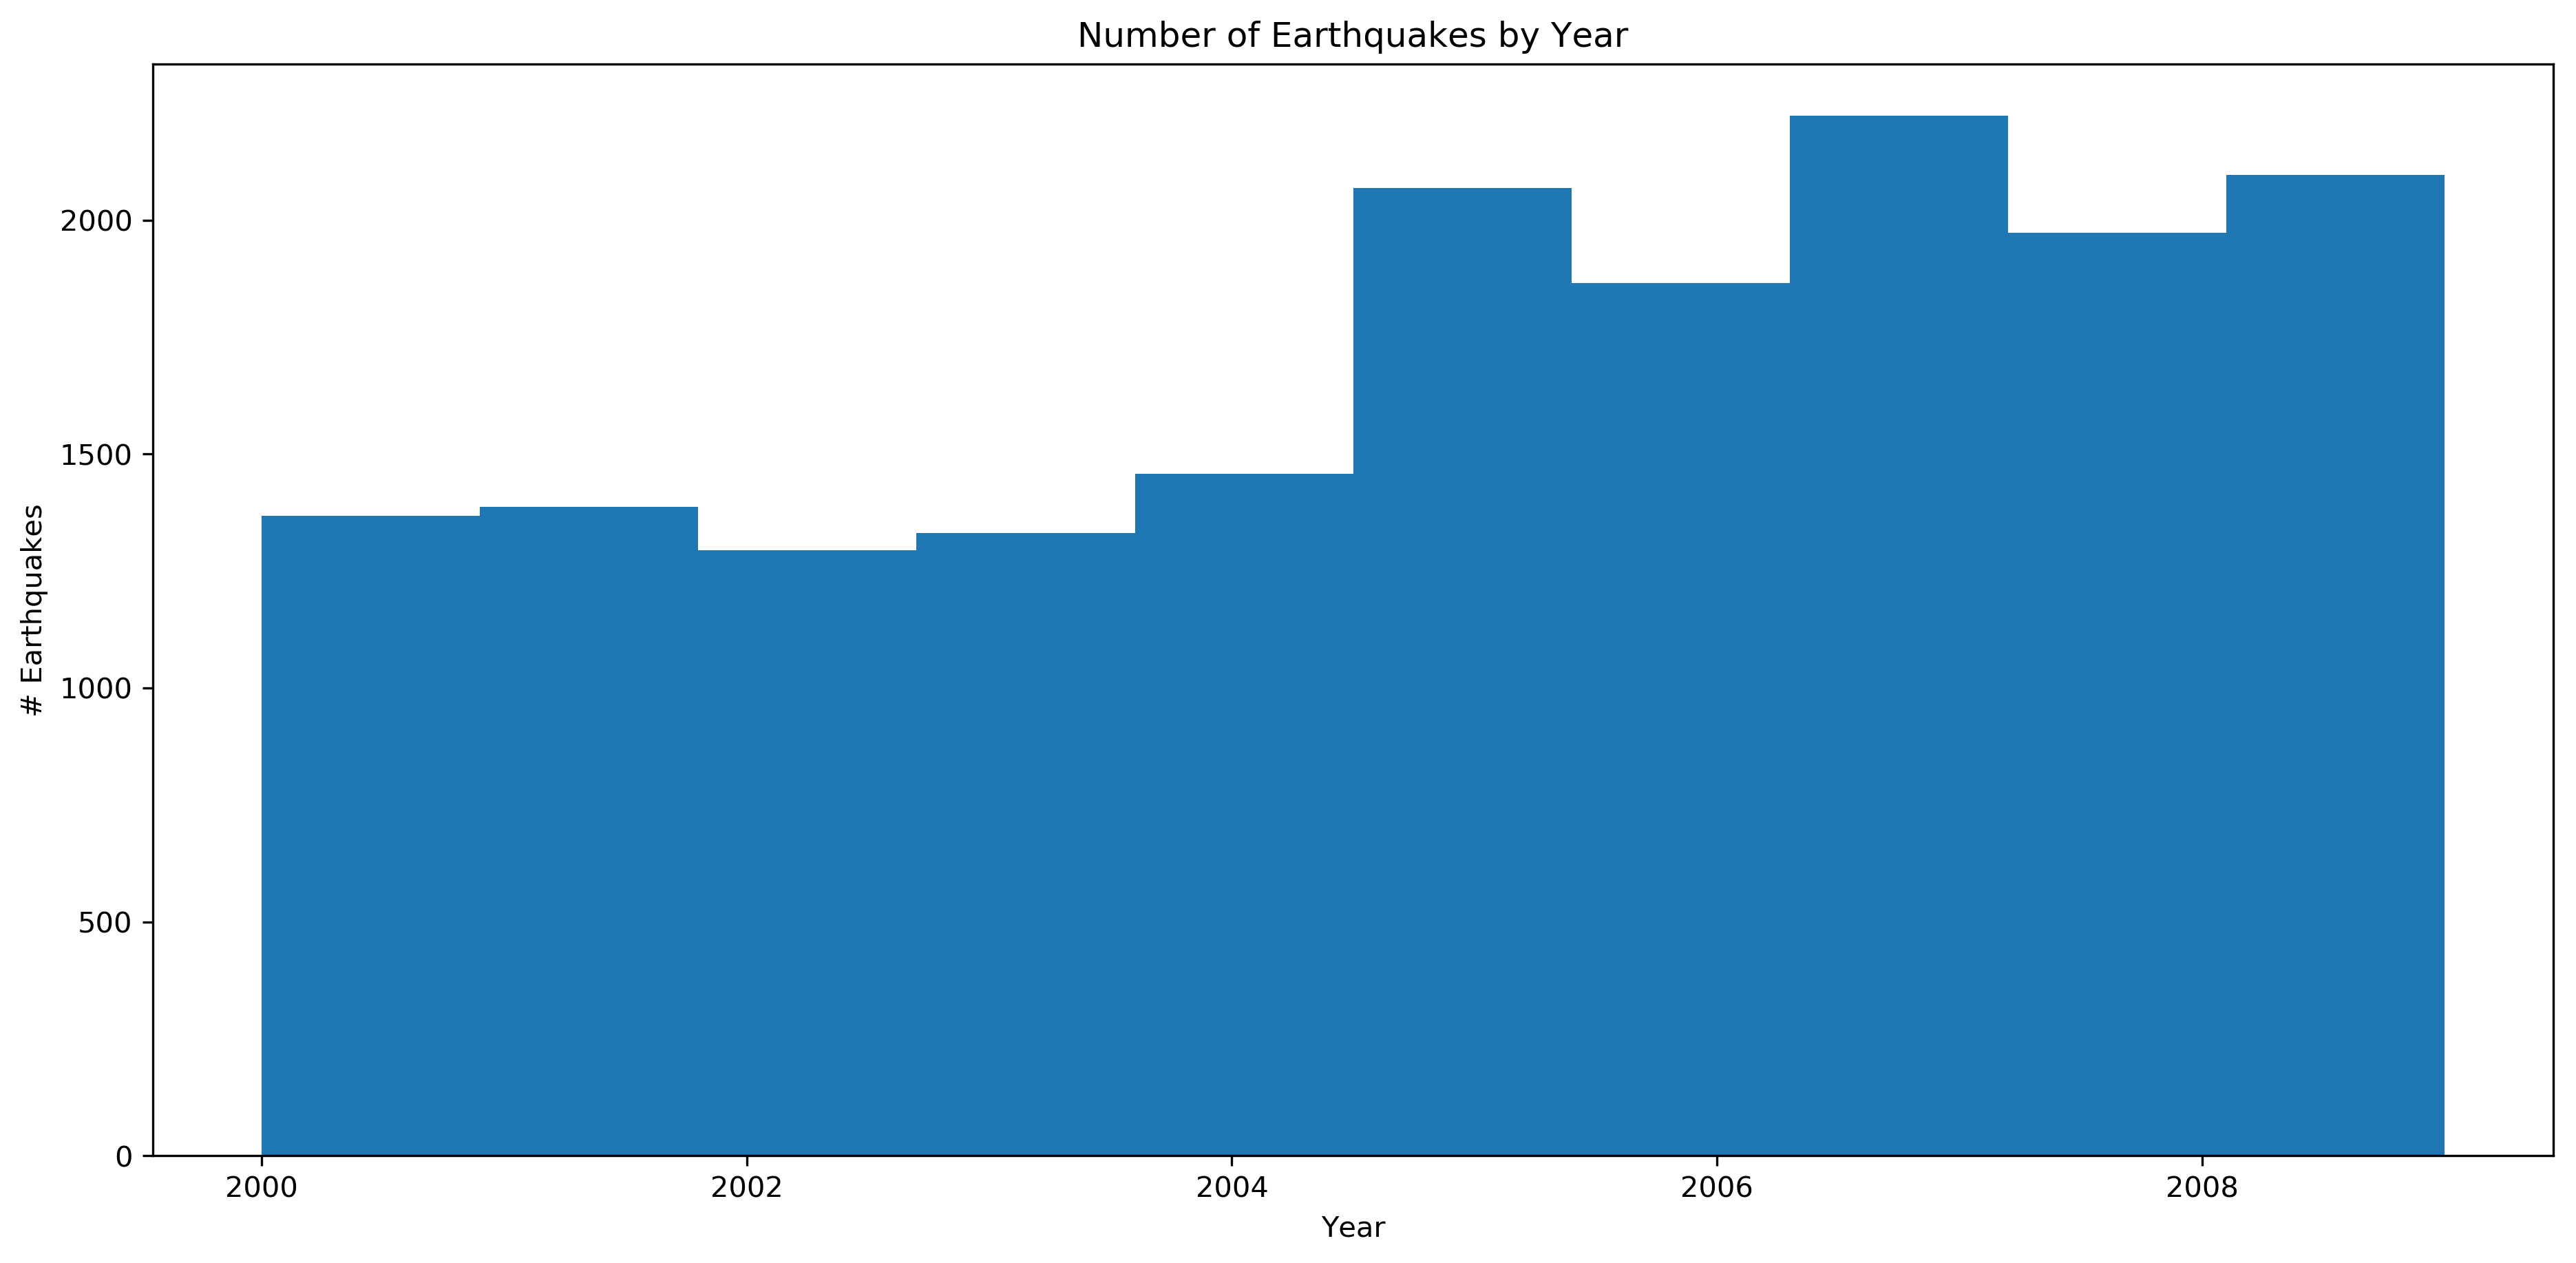

Number of Earthquakes by Year
	Year 2000 : 1368
	Year 2001 : 1387
	Year 2002 : 1295
	Year 2003 : 1331
	Year 2004 : 1458
	Year 2005 : 2069
	Year 2006 : 1865
	Year 2007 : 2223
	Year 2008 : 1973
	Year 2009 : 2096


In [24]:
print("Question 1")
years, magnitudes, longitude, latitude = np.load("earthquakes.npy").T      #load the data
year_num = np.zeros(len(years))
for i in range(len(years)):                                                #For each year
    year_num[i] = int(years[i])
plt.figure(figsize=(15,7))
plt.title("Number of Earthquakes by Year")
plt.hist(year_num)                                                         #Create histogram of earthquakes
plt.xlabel('Year')
plt.ylabel('# Earthquakes')
plt.show()
un_year,year_count = np.unique(year_num,return_counts=True)
print("Number of Earthquakes by Year")
for i in range(len(year_count)):
    print("\tYear",int(un_year[i]),":",year_count[i])                      #Print number of earthquakes each year 


Question 2


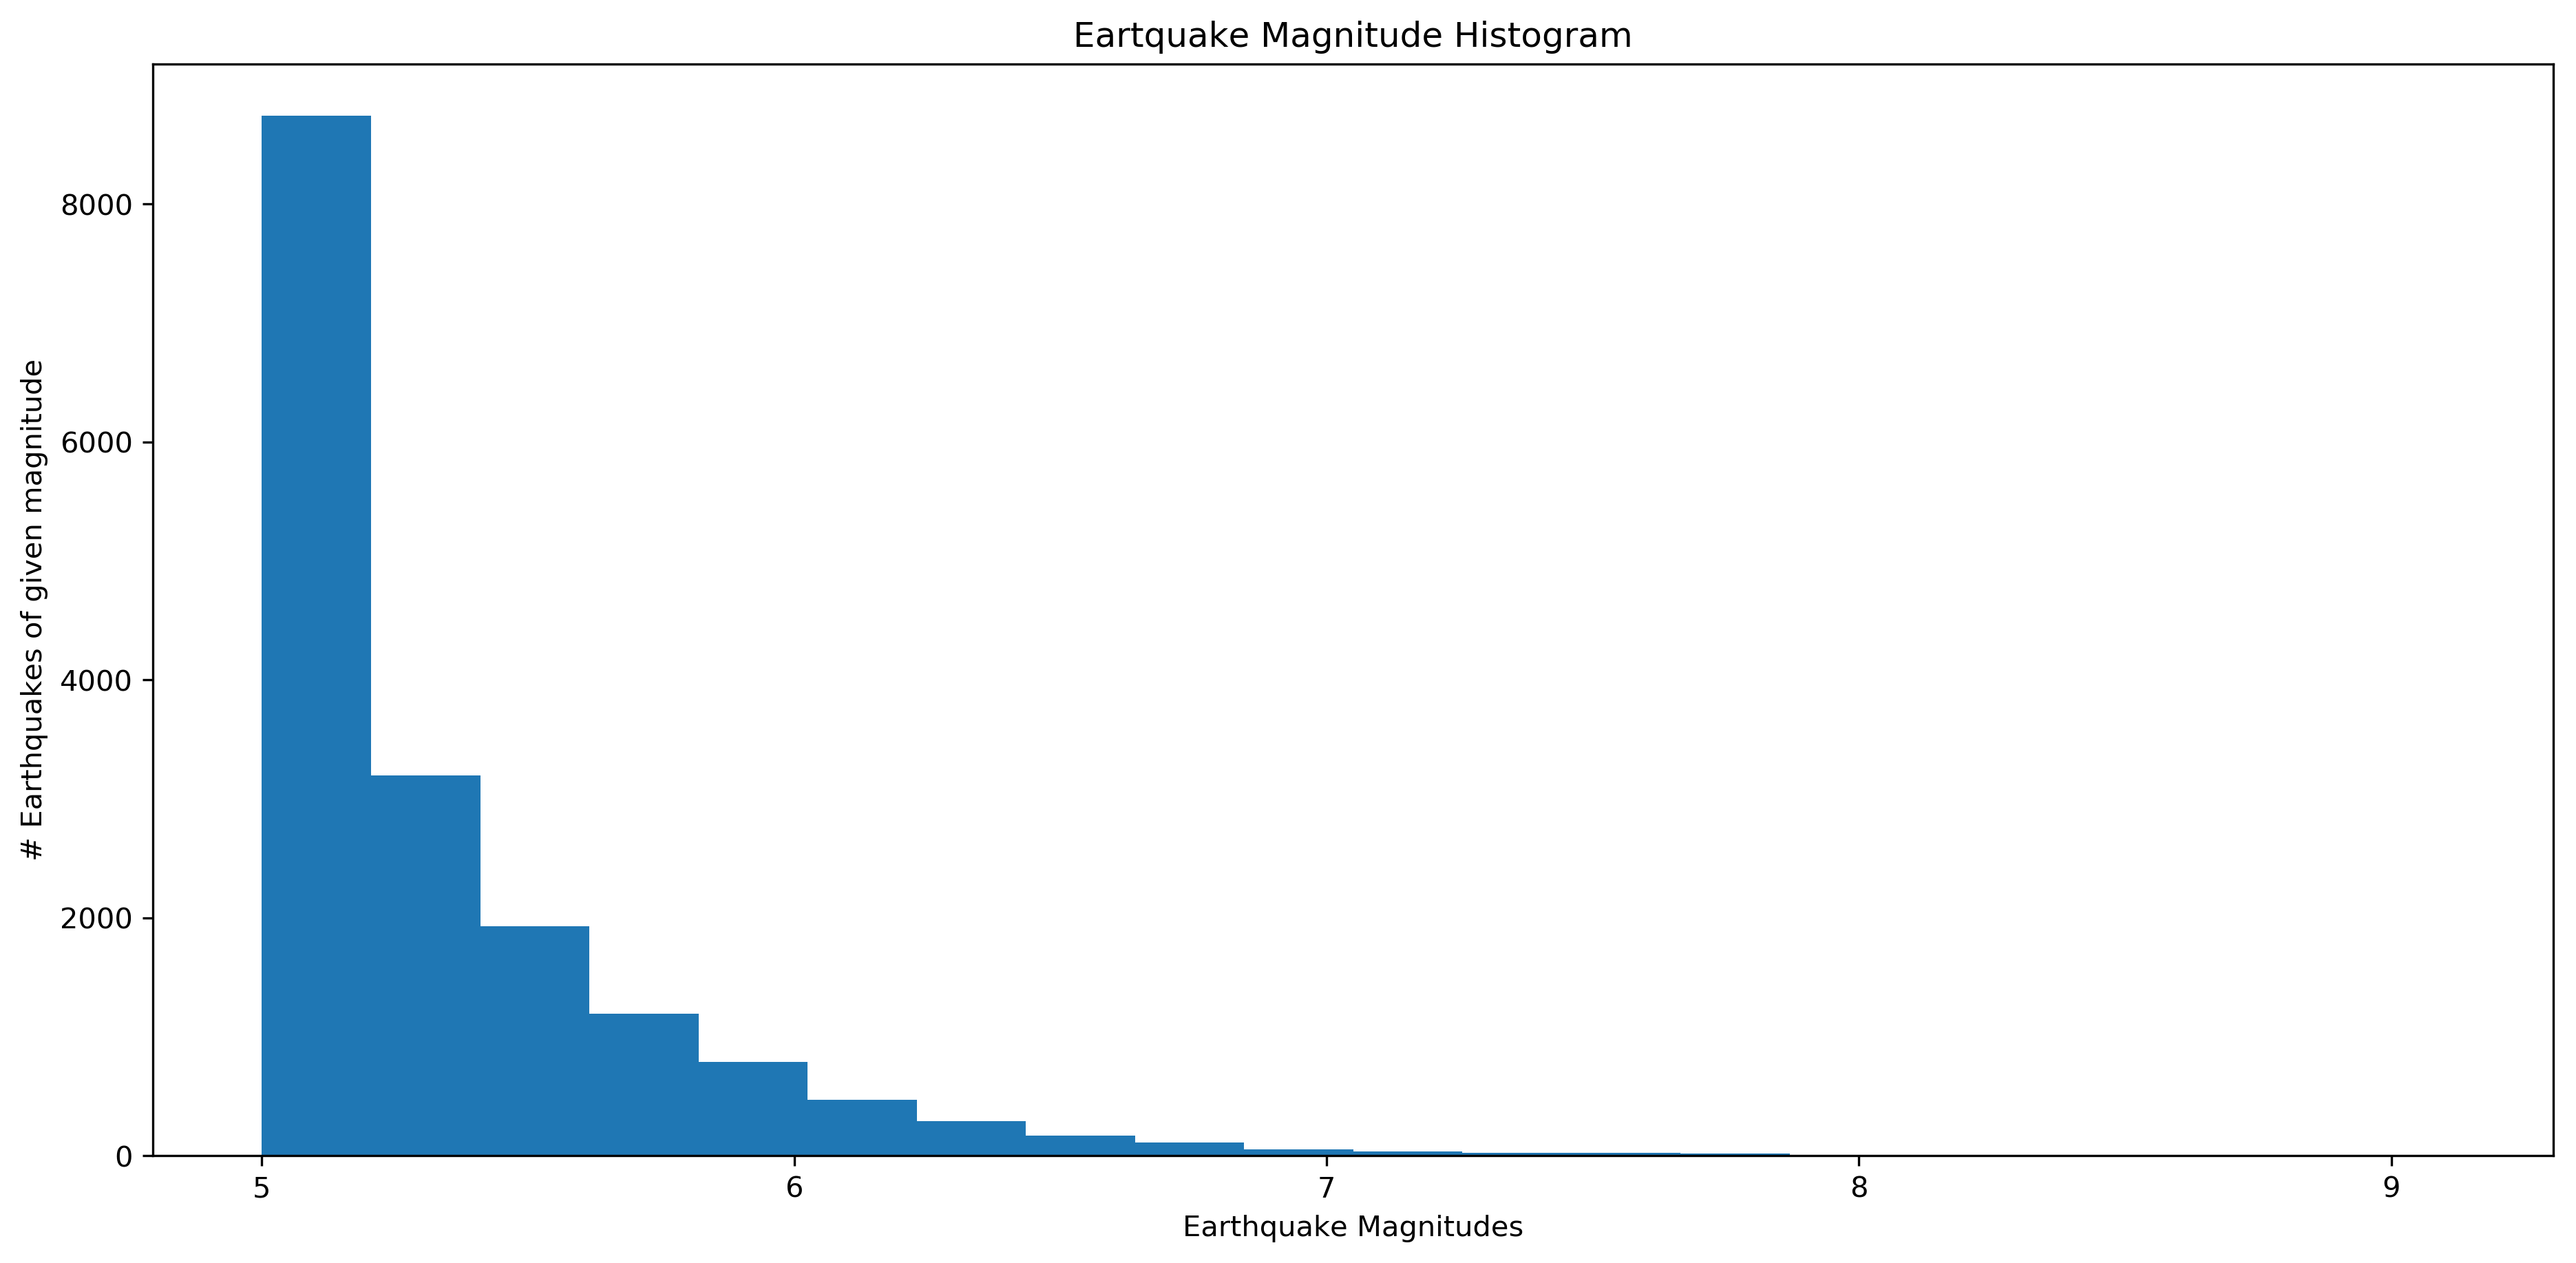

# Earthquakes greater certain range
	Greater than 5 : 17065
	Greater than 6 : 1579
	Greater than 7 : 144
	Greater than 8 : 13

Looking at the histogram for magnitudes of earthquakes, close to 90% of all earthquakes are between
Magnitude 5 and 6, while less than 0.1% of all recorded earthquakes have magnitude greater than 8,
thus they are extremely rare while lower magnitude earthquakes are quite common.


In [23]:
print("Question 2")
plt.figure(figsize=(15,7))
plt.hist(magnitudes,bins=20)                               #Create histogram of magnitudes
plt.title('Eartquake Magnitude Histogram')
plt.xlabel('Earthquake Magnitudes')
plt.ylabel('# Earthquakes of given magnitude')
plt.show()

a = np.arange(5,9)     
counts = np.zeros(len(a))
for i in range(len(a)):                                    #Print number of earthquakes greater than a certain magnitude 
    for j in magnitudes:
        if a[i] <= j:
            counts[i]+=1
            
print("# Earthquakes greater certain range")
for k in range(len(a)):
    print("\tGreater than",a[k],":",int(counts[k]))

print("\nLooking at the histogram for magnitudes of earthquakes, close to 90% of all earthquakes are between\n"
        "Magnitude 5 and 6, while less than 0.1% of all recorded earthquakes have magnitude greater than 8,\n"
        "thus they are extremely rare while lower magnitude earthquakes are quite common.")

Question 3


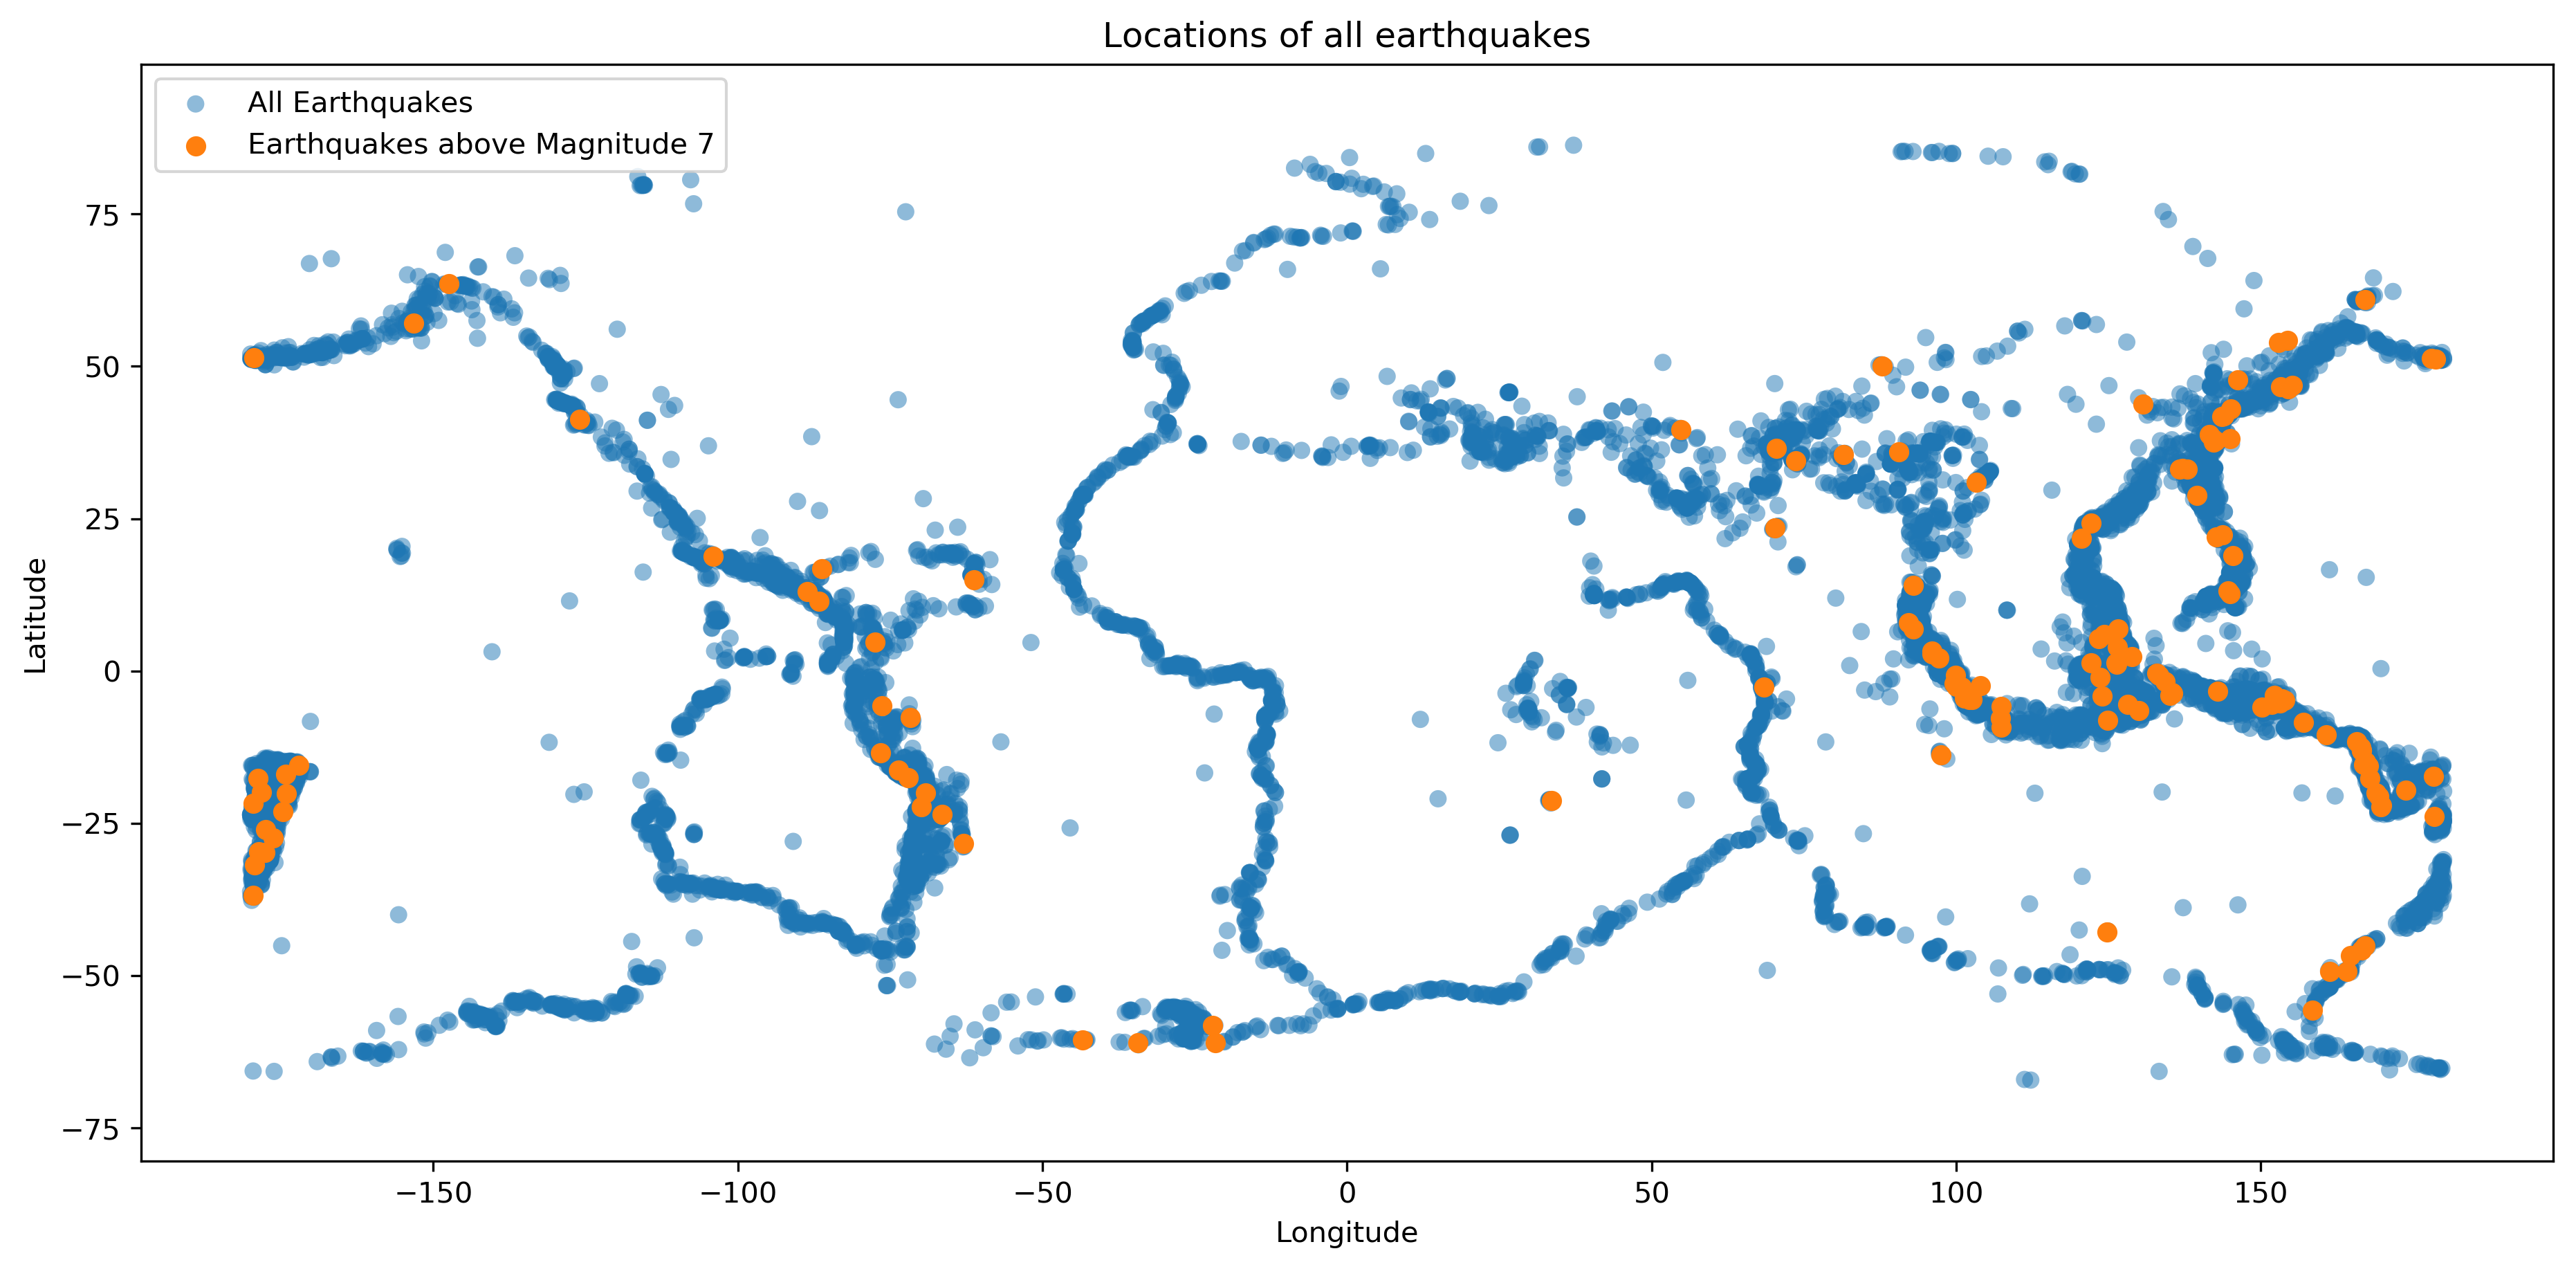

Earthquakes happen most often around edges of countries, or the so called Ring of Fire countries where tectonic plates are shifting against each other. Some countries with major tectonic activity include Japan, Phillipines, Indonesia, Chile.

Major Earthquakes above Magnitude 7 appear to occur in the places with the highest number of earthquakes over that same period. These locations include Indonesia, Japan, Phillipines and Chile. We also see some major earthquakes ovvuring in the Pacific Ocean around New Zealand and other parts.


In [22]:
print("Question 3")

mask = magnitudes >= 7
longitudes_m = longitude[mask]
latitudes_m = latitude[mask]
plt.figure(figsize=(15,7))
plt.scatter(longitude,latitude,alpha=.5,edgecolor='none',label='All Earthquakes')      #Scatter plot of all earthquakes
plt.scatter(longitudes_m,latitudes_m,label='Earthquakes above Magnitude 7')            #Scatter plot of earthquakes above a certain magnitude
plt.title('Locations of all earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.legend(loc='upper left')
plt.show()

print('Earthquakes happen most often around edges of countries, or the so called Ring of Fire countries where '
      'tectonic plates are shifting against each other. Some countries with major tectonic activity include '
      'Japan, Phillipines, Indonesia, Chile.\n')

print('Major Earthquakes above Magnitude 7 appear to occur in the places with the highest number of earthquakes '
     'over that same period. These locations include Indonesia, Japan, Phillipines and Chile. We also see some '
     'major earthquakes ovvuring in the Pacific Ocean around New Zealand and other parts.')

### Problem 5

The _Rosenbrock function_ is defined as follows. $$f(x,y)=(1−x)^2 +100(y−x^2)^2$$
The minimum value of $f$ is $0$, which occurs at the point $(1, 1)$ at the bottom of a steep, banana-shaped valley of the function.

Use a heat map and a contour plot to visualize the Rosenbrock function.
Plot the minimizer $(1, 1)$.
Use a different sequential colormap for each visualization.

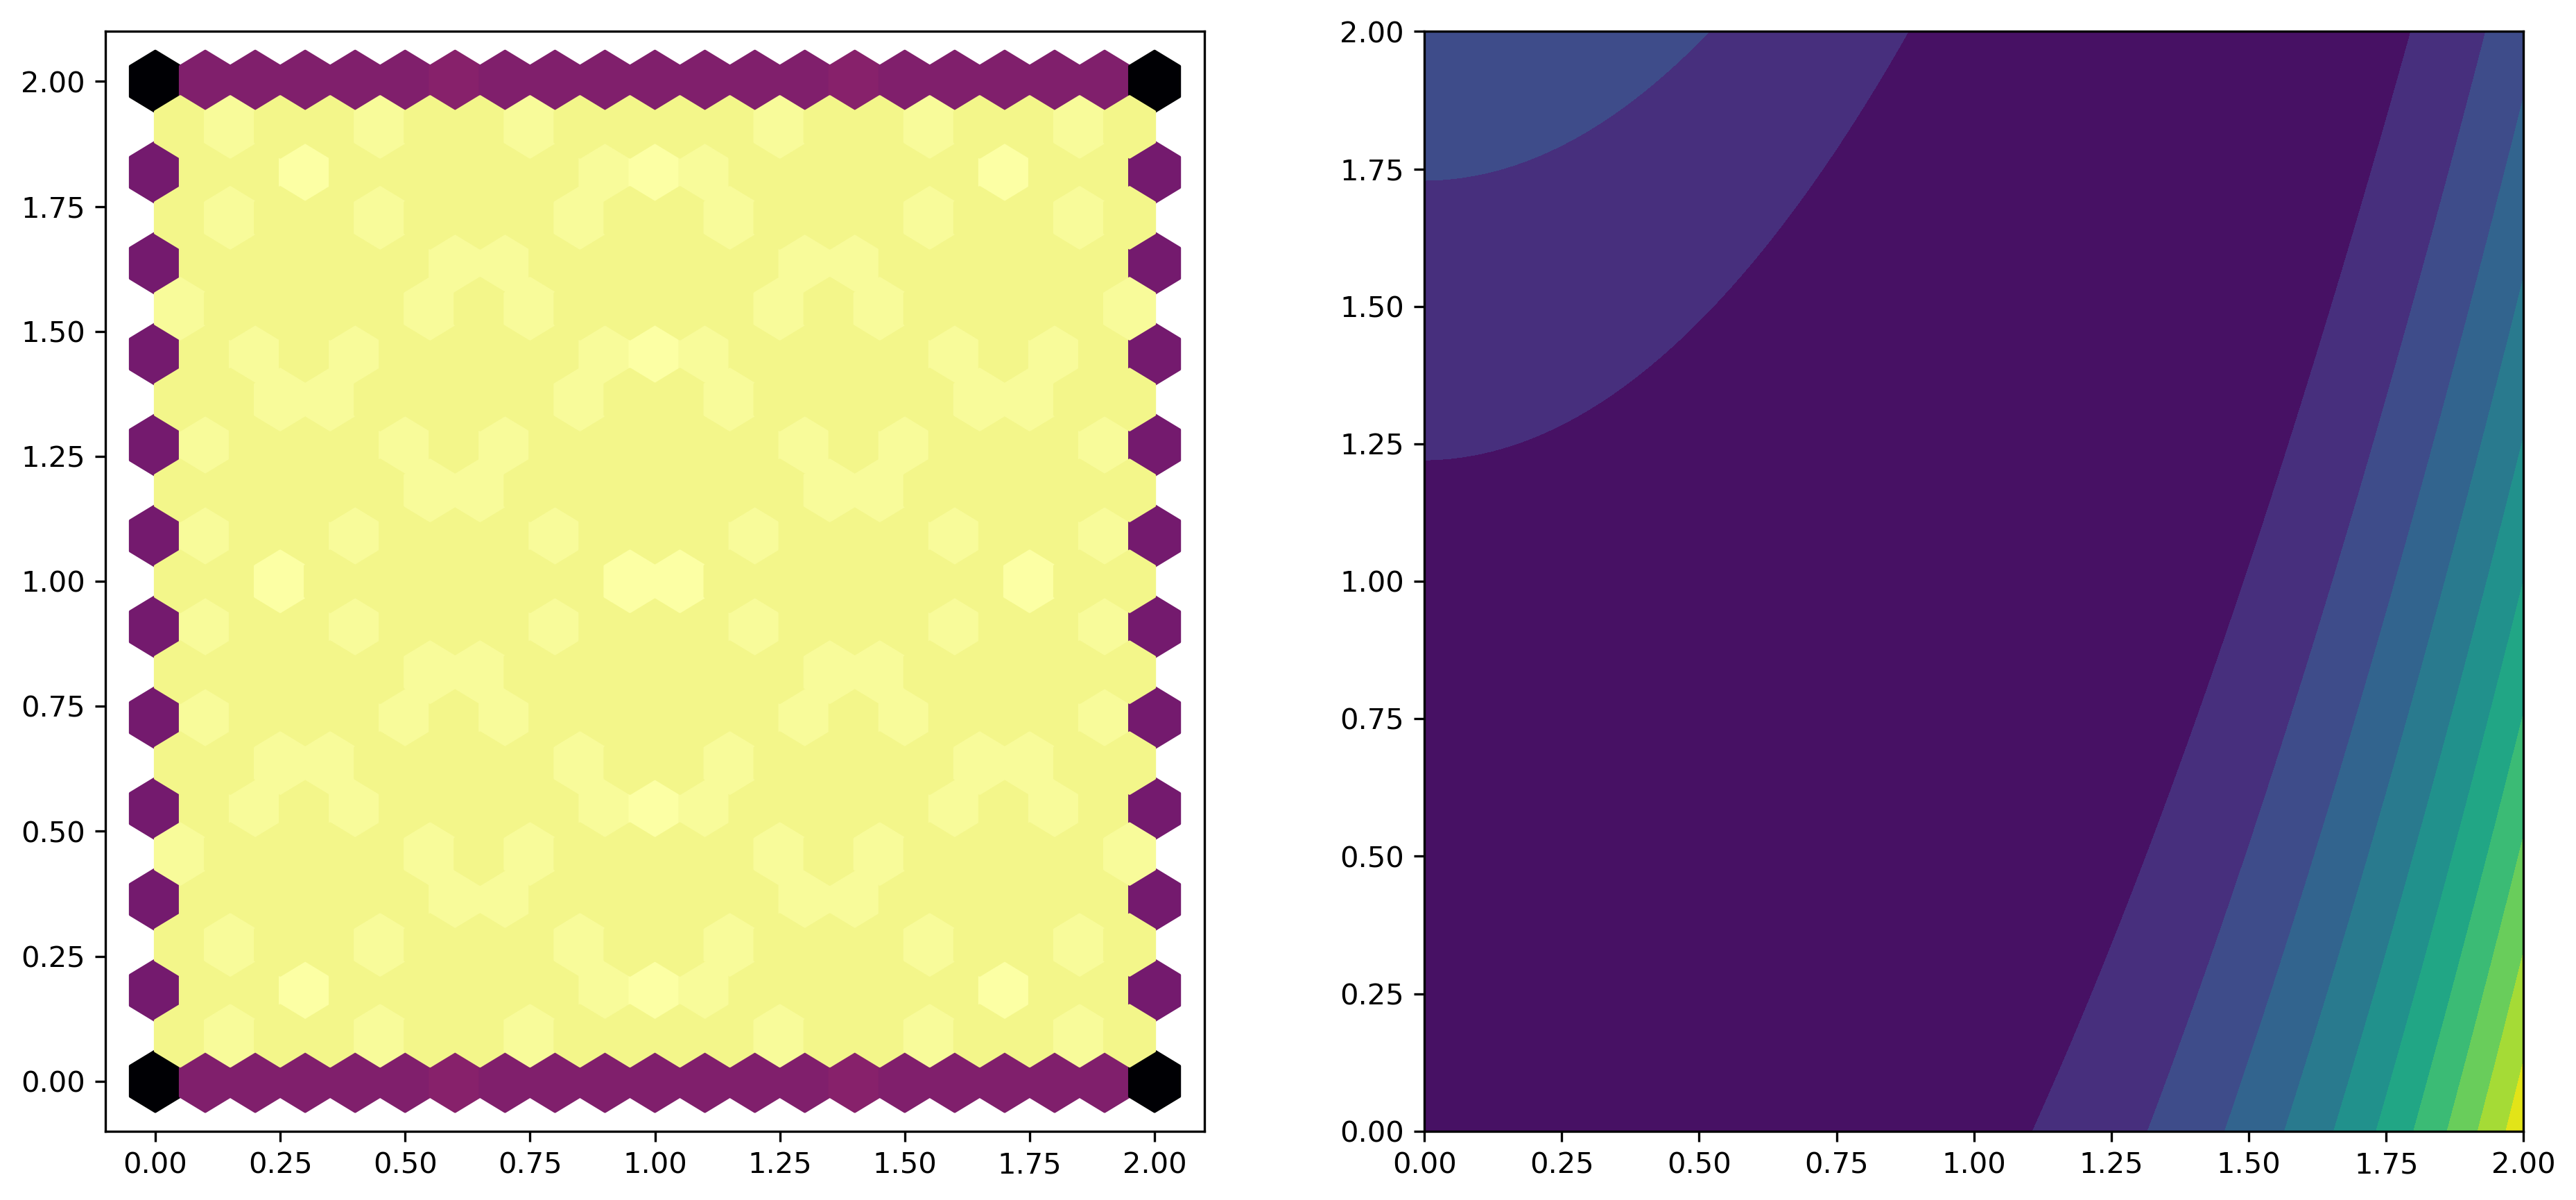

In [21]:
xs = np.linspace(0,2,200)
X, Y = np.meshgrid(xs,xs)

Z = (1-X)**2 + 100*(Y-X**2)**2                       #Rosenbrock function
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.hexbin(X,Y,gridsize=20,cmap='inferno')           #create a heat map

plt.subplot(122)
plt.contourf(X,Y,Z,12,cmap='viridis')                #create a contour plot
plt.axis([0,2,0,2])
plt.show()

### Problem 6

The file `countries.npy` contains information from 20 different countries.
Each row in the array represents a different country; the columns are the 2015 population (in millions of people), the 2015 GDP (in billions of US dollars), the average male height (in centimeters), and the average female height (in centimeters), in that order.

Visualize this data set with at least four plots, using at least one scatter plot, one histogram, and one bar chart.
List the major insights that your visualizations reveal.

(Hint: consider using `np.argsort()` and fancy indexing to sort the data for the bar chart.)

In [ ]:
countries = np.array(
            ["Austria", "Bolivia", "Brazil", "China", "Finland",
             "Germany", "Hungary", "India", "Japan", "North Korea",
             "Montenegro", "Norway", "Peru", "South Korea", "Sri Lanka",
             "Switzerland", "Turkey", "United Kingdom", "United States", "Vietnam"])
population, gdp, male, female = np.load("countries.npy").T

